In [59]:
import networkx as nx
import osmnx as ox
import pandas as pd
import os

ox.__version__

'2.0.1'

In [8]:
# download/model a street network for some city then visualize it
capitals_comarca = [
    "Barcelona", "Girona", "Lleida", "Tarragona", "Mataró", "Sabadell", 
    "Terrassa", "Manresa", "Vic", "Igualada", "Vilafranca del Penedès", "Vilanova i la Geltrú", 
    "El Vendrell", "Reus", "Tortosa", "Amposta", "Gandesa", "Falset", "Montblanc", 
    "Valls", "Balaguer", "Cervera", "Solsona", "La Seu d'Urgell", "Sort", "Tremp", 
    "Pont de Suert", "Mollerussa", "Les Borges Blanques", "Tàrrega", 
    "Olot", "Ripoll", "Puigcerdà", "Banyoles", "La Bisbal d'Empordà", "Santa Coloma de Farners", 
    "Blanes", "Figueres", "Vielha e Mijaran", "Berga", "Sant Feliu de Llobregat", "Granollers", "Móra d'Ebre",
    "Prats de Lluçanès", "Moià"
]

for capital in capitals_comarca:
#if capital is not saved, download it
    if not os.path.exists(f"Graphs/{capital}.graphml"):
        print(f"Creant graf de {capital}...")
        try:
            # Obtenir el graf de la ciutat
            G = ox.graph_from_place(capital + ", Catalunya, Spain", network_type='drive')
            
            # Guardar el graf en un fitxer
            ox.save_graphml(G, filepath=f"Graphs/{capital}.graphml")
            print(f"Graf de {capital} creat i guardat.")
        except Exception as e:
            print(f"No s'ha pogut crear el graf per a {capital}: {e}")

Creant graf de Vielha e Mijaran...
Graf de Vielha e Mijaran creat i guardat.
Creant graf de Berga...
Graf de Berga creat i guardat.
Creant graf de Sant Feliu de Llobregat...
Graf de Sant Feliu de Llobregat creat i guardat.
Creant graf de Granollers...
Graf de Granollers creat i guardat.
Creant graf de Móra d'Ebre...
Graf de Móra d'Ebre creat i guardat.
Creant graf de Prats de Lluçanès...
Graf de Prats de Lluçanès creat i guardat.
Creant graf de Moià...
Graf de Moià creat i guardat.


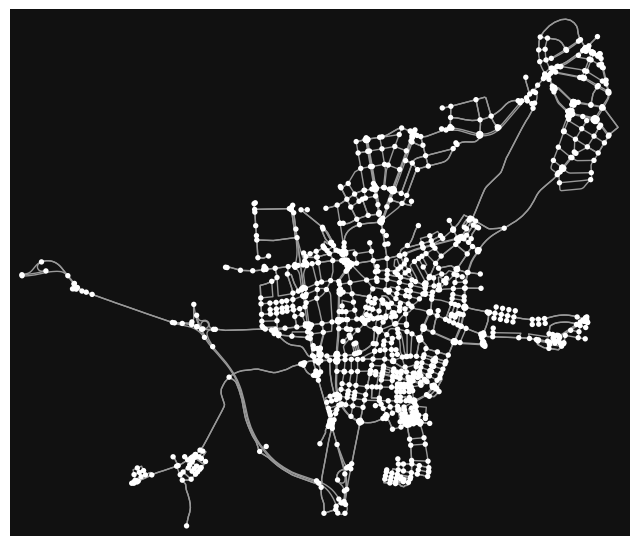

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [49]:
# #Visualize the graphs
# for capital in capitals_comarca:
#     print(f"Visualitzant graf de {capital}...")
#     try:
#         # Carregar el graf des del fitxer
#         G = ox.load_graphml(filepath=f"Graphs/{capital}.graphml")
#         ox.plot_graph(G)
#     except Exception as e:
#         print(f"No s'ha pogut visualitzar el graf per a {capital}: {e}")

# Load "Vic" graph and visualize it
G = ox.load_graphml(filepath=f"Graphs/Vic.graphml")
ox.plot_graph(G)


In [36]:
# Convert the graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.convert.graph_to_gdfs(G)

## Basic street network stats

In [37]:
# What sized area does our network cover in square meters?
G_proj = ox.projection.project_graph(G)
nodes_proj = ox.convert.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.union_all().convex_hull.area
graph_area_m

2446380.064426361

In [62]:
data = []

for capital in capitals_comarca:
    try:
         # Obtenir el graf de la ciutat
        G = ox.graph_from_place(capital + ", Catalunya, Spain", network_type='drive')
        G_proj = ox.projection.project_graph(G)
        # Add edge bearings
        ox.bearing.add_edge_bearings(G)

        # Show some basic stats about the network
        basic_stats=ox.stats.basic_stats(G_proj)

        # Calcular les mètriques
        num_nodes = len(G.nodes)
        num_edges = len(G.edges)
        avg_node_degree = sum(dict(G.degree()).values()) / num_nodes
        total_length = basic_stats["street_length_total"]
        avg_edge_length = total_length / num_edges
        avg_betweenness_centrality_nodes = nx.betweenness_centrality(G)
        avg_betweenness_centrality_nodes = sum(avg_betweenness_centrality_nodes.values()) / num_nodes
        avg_betweenness_centrality_edges = nx.edge_betweenness_centrality(G)
        avg_betweenness_centrality_edges = sum(avg_betweenness_centrality_edges.values()) / num_edges
        orientation_entropy = ox.bearing.orientation_entropy(G)
        dead_ends = len([node for node, degree in dict(G.degree()).items() if degree == 1]) / num_nodes
        k4_intersections = len([node for node, degree in dict(G.degree()).items() if degree == 4]) / num_nodes
        detour_index = basic_stats["circuity_avg"]

        # Afegir les mètriques a la taula
        data.append({
            "Capital": capital,
            "Number of Nodes": num_nodes,
            "Number of Edges": num_edges,
            "Average Node Degree": avg_node_degree,
            "Total Length (m)": total_length,
            "Average Edge Length (m)": avg_edge_length,
            "Betweenness Centrality (Nodes)": avg_betweenness_centrality_nodes,
            "Betweenness Centrality (Edges)": avg_betweenness_centrality_edges,
            "Orientation Entropy": orientation_entropy,
            "Proportion of Dead-ends": dead_ends,
            "Proportion of k=4 Intersections": k4_intersections,
            "Detour Index": detour_index
        })

        print(f"Mètriques de {capital} calculades i afegides a la taula.")
    except Exception as e:
        print(f"No s'han pogut calcular les mètriques per a {capital}: {e}")

# Crear el DataFrame
df_data = pd.DataFrame(data)

# Mostrar la taula
print(df_data)


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Barcelona calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Girona calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Lleida calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Tarragona calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Mataró calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Sabadell calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Terrassa calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Manresa calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Vic calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Igualada calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Vilafranca del Penedès calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Vilanova i la Geltrú calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de El Vendrell calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Reus calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Tortosa calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Amposta calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Gandesa calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Falset calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Montblanc calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Valls calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Balaguer calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Cervera calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Solsona calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de La Seu d'Urgell calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Sort calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Tremp calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Pont de Suert calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Mollerussa calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Les Borges Blanques calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Tàrrega calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Olot calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Ripoll calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Puigcerdà calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Banyoles calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de La Bisbal d'Empordà calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Santa Coloma de Farners calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Blanes calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Figueres calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Vielha e Mijaran calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Berga calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Sant Feliu de Llobregat calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Granollers calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Móra d'Ebre calculades i afegides a la taula.


c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


Mètriques de Prats de Lluçanès calculades i afegides a la taula.
Mètriques de Moià calculades i afegides a la taula.
                    Capital  Number of Nodes  Number of Edges  \
0                 Barcelona             8885            16491   
1                    Girona             2104             4390   
2                    Lleida             3240             6769   
3                 Tarragona             2768             5385   
4                    Mataró             1718             3371   
5                  Sabadell             3144             6291   
6                  Terrassa             3654             7024   
7                   Manresa             1524             2937   
8                       Vic             1295             2598   
9                  Igualada              982             2075   
10   Vilafranca del Penedès              787             1611   
11     Vilanova i la Geltrú             1614             3009   
12              El Vendrell           

c:\Python311\Lib\site-packages\osmnx\bearing.py:282: UserWarning: `G` is a MultiDiGraph, so edge bearings will be directional (one per edge). If you want bidirectional edge bearings (two reciprocal bearings per edge), pass a MultiGraph instead. Use `convert.to_undirected`.
  bearings, weights = _extract_edge_bearings(G, min_length, weight)


In [63]:
#write the datafreame to a csv file
df_data.to_csv("metrics.csv", index=False)

### Betweenness Centrality

In [ ]:
# Node betweenness centrality
betweenness = nx.betweenness_centrality(G_proj, normalized=True, weight='length')
#Save the betweenness centrality in the nodes in a file
nx.set_node_attributes(G_proj, betweenness, 'betweenness')


{318186440: 0.002501282019099395,
 318190937: 0.002501282019099395,
 318186462: 1.0160524330869705e-05,
 1882919651: 0.0,
 318196807: 0.03159923066900478,
 318186599: 0.0,
 373347826: 0.0007596486132079644,
 1882921254: 0.0009407450174581715,
 1882919602: 0.03753895365725085,
 1882919603: 0.03381063890572348,
 1882919614: 0.029390213143893344,
 318196826: 0.01847063787771749,
 555067127: 0.021500864839923927,
 2013591981: 0.015298761252780697,
 318196836: 0.02028937173294317,
 318196870: 0.061565007632346805,
 2108633499: 0.05835846568910469,
 318196848: 0.04882131940982893,
 318196852: 0.06083703594793508,
 318196854: 0.07732995764854388,
 2717277894: 0.04191216286483753,
 318196860: 0.050560562104113096,
 393949923: 0.030197675989246577,
 318196863: 0.042613836721569355,
 3749060247: 0.08445905966140352,
 318196872: 0.10560669686135427,
 318196880: 0.07856057644838274,
 5227169731: 0.06992711915665258,
 318196873: 0.06300660673152667,
 318196875: 0.062352747106940117,
 553049779: 0.0

In [26]:
# Edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G_proj, normalized=True, weight='length')
edge_betweenness

{(318186440, 318190937, 0): 0.003264845768709756,
 (318190937, 1882919602, 0): 0.0024872742028847128,
 (318190937, 318186462, 0): 0.0007775715658250434,
 (318186462, 1882919651, 0): 1.0741587248542425e-05,
 (318186462, 318196807, 0): 0.000766829978576501,
 (318196807, 1882919603, 0): 0.017202651978540696,
 (318196807, 1882919614, 0): 0.015115203523240616,
 (318186599, 373347826, 0): 0.0007590721655636647,
 (318186599, 1882921254, 0): 9.548077554259934e-06,
 (373347826, 373347828, 0): 2.5660458427073573e-05,
 (373347826, 12118988825, 0): 0.0015008384405602333,
 (1882921254, 553057190, 0): 0.0017067188628239632,
 (1882919602, 1882919603, 0): 0.017323196457663226,
 (1882919602, 516364519, 0): 0.020925208715007786,
 (1882919603, 1882919602, 0): 0.017930096137205875,
 (1882919603, 1882919651, 0): 0.000757281901022241,
 (1882919603, 318196807, 0): 0.015838470397975805,
 (1882919614, 318196807, 0): 0.015712555125229004,
 (1882919614, 12118988825, 0): 0.014399694461518262,
 (318196826, 5550671

#### Visualisation

##### Nodes

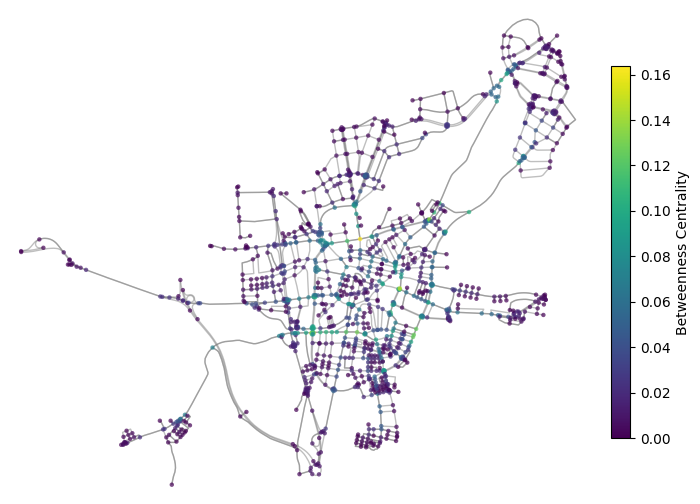

In [27]:
import matplotlib.pyplot as plt

# Compute betweenness centrality
betweenness = nx.betweenness_centrality(G_proj, normalized=True, weight='length')

# Assign betweenness as a node attribute
nx.set_node_attributes(G_proj, betweenness, 'betweenness')

# Visualize the graph
fig, ax = ox.plot_graph(
    G_proj, 
    node_color=[G_proj.nodes[n]['betweenness'] for n in G_proj.nodes()],
    node_size=10,
    node_alpha=0.7,
    edge_color='gray',
    edge_alpha=0.5,
    show=False,
    close=False,
    bgcolor='white'
)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(betweenness.values()), vmax=max(betweenness.values())))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Betweenness Centrality')

plt.show()

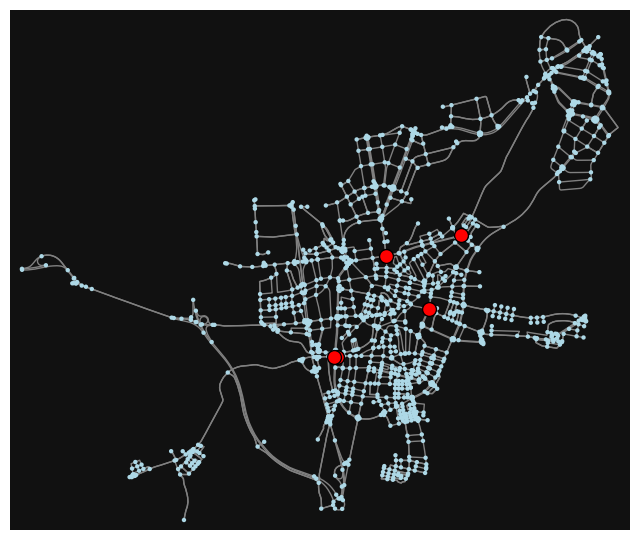

In [29]:
# Identify top 5 nodes by betweenness centrality
top_nodes = sorted(betweenness, key=betweenness.get, reverse=True)[:5]

# Extract node positions
node_x = [G_proj.nodes[n]['x'] for n in G_proj.nodes()]
node_y = [G_proj.nodes[n]['y'] for n in G_proj.nodes()]

# Plot the graph
fig, ax = ox.plot_graph(G_proj, node_size=10, node_color='lightblue', edge_color='gray', show=False, close=False)

# Highlight top nodes
for n in top_nodes:
    x = G_proj.nodes[n]['x']
    y = G_proj.nodes[n]['y']
    ax.scatter(x, y, c='red', s=100, edgecolors='black', zorder=5)

plt.show()

Computing betweenness centrality...
Betweenness centrality computed.
Visualizing the graph with betweenness centrality...


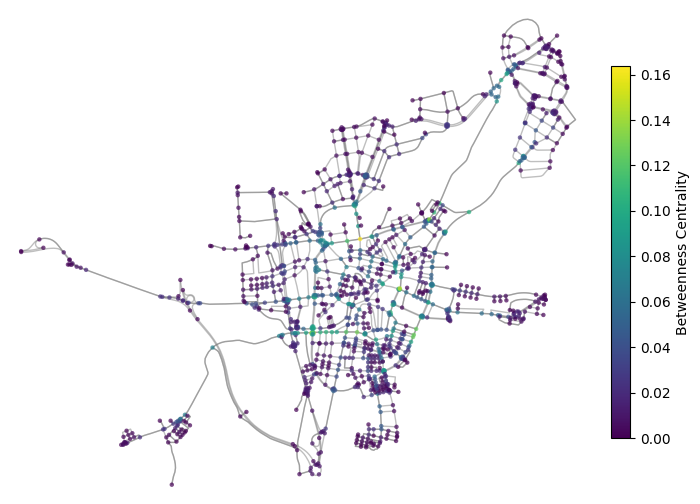

Top 5 nodes by betweenness centrality:
1. Node ID: 516347451, Betweenness Centrality: 0.1638
2. Node ID: 525882696, Betweenness Centrality: 0.1462
3. Node ID: 318198378, Betweenness Centrality: 0.1451
4. Node ID: 3149756903, Betweenness Centrality: 0.1400
5. Node ID: 3544271449, Betweenness Centrality: 0.1389


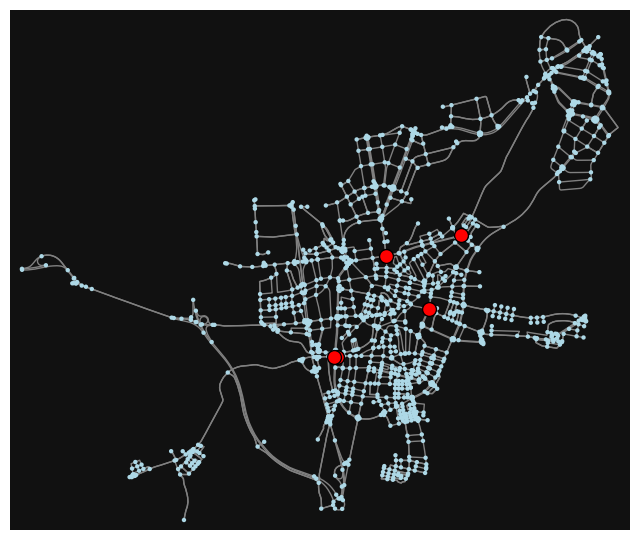

In [30]:
# 3. Compute betweenness centrality
print("Computing betweenness centrality...")
betweenness = nx.betweenness_centrality(G_proj, normalized=True, weight='length')
print("Betweenness centrality computed.")

# 4. Assign betweenness as a node attribute
nx.set_node_attributes(G_proj, betweenness, 'betweenness')

# 5. Visualize the graph with betweenness centrality
print("Visualizing the graph with betweenness centrality...")
fig, ax = ox.plot_graph(
    G_proj, 
    node_color=[G_proj.nodes[n]['betweenness'] for n in G_proj.nodes()],
    node_size=10,
    node_alpha=0.7,
    edge_color='gray',
    edge_alpha=0.5,
    bgcolor='white',
    show=False,
    close=False
)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(betweenness.values()), vmax=max(betweenness.values())))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Betweenness Centrality')

plt.show()

# 6. Identify and highlight top 5 nodes
top_n = 5
top_nodes = sorted(betweenness, key=betweenness.get, reverse=True)[:top_n]
print(f"Top {top_n} nodes by betweenness centrality:")

for i, node in enumerate(top_nodes, start=1):
    print(f"{i}. Node ID: {node}, Betweenness Centrality: {betweenness[node]:.4f}")

# Optional: Visualize top nodes
fig, ax = ox.plot_graph(
    G_proj, 
    node_color='lightblue', 
    node_size=10, 
    edge_color='gray',
    show=False, 
    close=False
)

for node in top_nodes:
    x = G_proj.nodes[node]['x']
    y = G_proj.nodes[node]['y']
    ax.scatter(x, y, c='red', s=100, edgecolors='black', zorder=5)

plt.show()


##### Edges

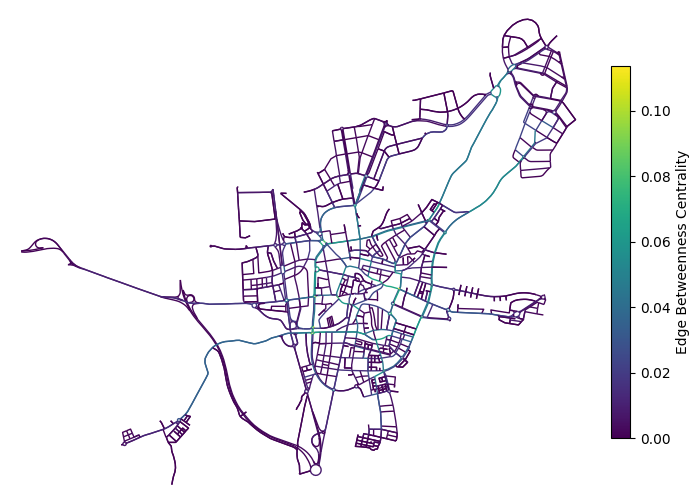

In [31]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

# 1. (Optional) Convert to MultiGraph or confirm you have one
#    If your G_proj is already a MultiGraph or MultiDiGraph, skip this step.
# G_proj = nx.MultiGraph(G_proj)

# 2. Compute edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G_proj, normalized=True, weight='length')

# 3. Collect betweenness values by iterating with keys=True
all_edges = list(G_proj.edges(keys=True))  # list of (u, v, k)
edge_betweenness_values = [edge_betweenness[(u, v, k)] 
                           for (u, v, k) in all_edges]

# 4. Create a colormap
cmap = plt.cm.viridis
norm = colors.Normalize(
    vmin=min(edge_betweenness_values),
    vmax=max(edge_betweenness_values)
)
edge_colors = [cmap(norm(value)) for value in edge_betweenness_values]

# 5. Plot the graph with OSMnx, using the same ordering for edges
fig, ax = ox.plot_graph(
    G_proj,
    edge_color=edge_colors,
    edge_linewidth=1,
    node_size=0,
    bgcolor='white',
    show=False,
    close=False
)

# 6. Add a colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Edge Betweenness Centrality')

plt.show()


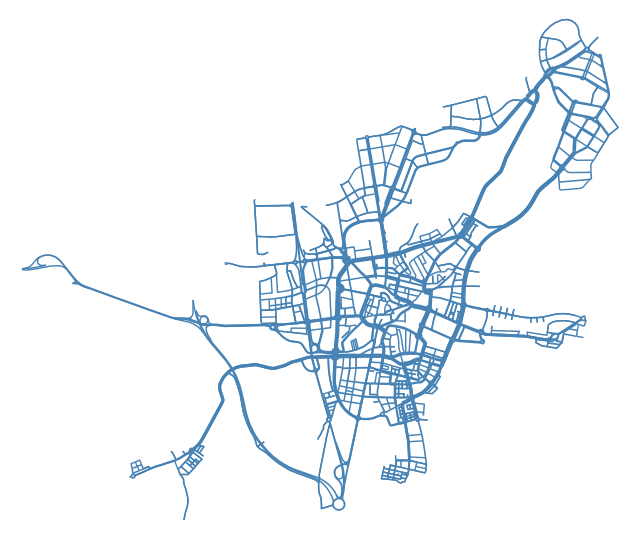

In [32]:
# Normalize betweenness for linewidth scaling
max_bet = max(edge_betweenness_values)
min_bet = min(edge_betweenness_values)
edge_widths = [1 + 4 * ((bet - min_bet) / (max_bet - min_bet)) for bet in edge_betweenness_values]

# Plot the graph with varying edge widths
fig, ax = ox.plot_graph(
    G_proj,
    edge_color='steelblue',
    edge_linewidth=edge_widths,
    node_size=0,  # Hide nodes for clarity
    bgcolor='white',
    show=False,
    close=False
)

# Optionally, add a legend or annotation for linewidth scaling

plt.show()


### Street angle orientation

#### Bearing

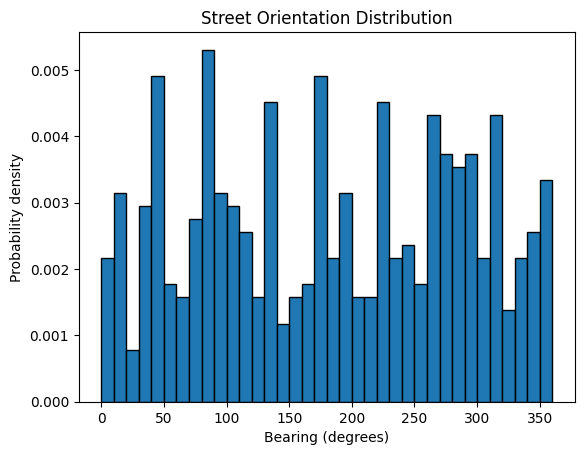

In [33]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

# 1. Download (or load) a street network
place = "Martorelles, Catalunya, Spain"
G = ox.graph_from_place(place, network_type="drive")

# 3. Add edge bearings (in degrees) to each edge's attributes
G = ox.bearing.add_edge_bearings(G)

# 4. Convert edges to a GeoDataFrame
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

# The bearing has been added to the edge attributes under the key "bearing"
orientations = edges["bearing"]  # In degrees from North, going clockwise

# 5. Bin these bearings to create an orientation histogram
num_bins = 36
counts, bin_edges = np.histogram(orientations, bins=num_bins, range=(0,360), density=True)

# 6. (Optional) Plot as a simple histogram, or use matplotlib’s polar plotting
plt.bar(bin_edges[:-1], counts, width=360/num_bins, edgecolor='k', align='edge')
plt.xlabel("Bearing (degrees)")
plt.ylabel("Probability density")
plt.title("Street Orientation Distribution")
plt.show()


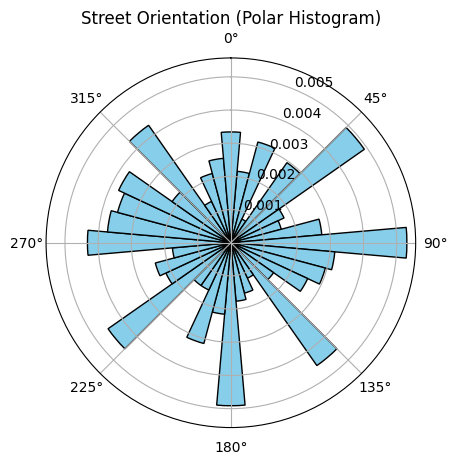

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Suppose bin_edges is length num_bins+1, and counts is length num_bins
theta_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # midpoint of each bin, in degrees
theta_radians = np.radians(theta_centers)               # convert to radians

# A polar bar chart
fig = plt.figure()
ax = fig.add_subplot(projection='polar')

# 'counts' can be probability density or absolute frequency
ax.bar(theta_radians, counts, 
       width=np.radians(360/num_bins), 
       bottom=0.0, 
       color='skyblue', 
       edgecolor='k', 
       align='edge')

ax.set_theta_direction(-1)   # make angles go clockwise
ax.set_theta_offset(np.radians(90))  # 0° at top
plt.title("Street Orientation (Polar Histogram)")
plt.show()


#### Orientation entropy

In [35]:
import math

# 1. Compute your city's orientation entropy
H0 = ox.bearing.orientation_entropy(ox.convert.to_undirected(G), num_bins=36, weight=None)

# 2. Define H_max and H_g
H_max = math.log(36)  # ~3.584913
H_g   = 1.386         # Boeing's "perfect 4-way grid" entropy in nats

# 3. Compute phi
phi = 1.0 - ((H0 - H_g) / (H_max - H_g))**2

print(f"Orientation-order phi = {phi:.4f}")

Orientation-order phi = 0.1014
